In [1]:
from pyvis.network import Network
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(0)
#%matplotlib widget
#%matplotlib qt
#



In [2]:
#Takes a csv describing the network and plots it.
def plot_full_network(df):
    net = Network(bgcolor='#ffffff', notebook = True)
    layer_num = 0
    old_leng = 0
    for ind, leng, lab in zip(df['index'].values, df['length'].values, df['function'].values):
        for i in range(leng):
            net.add_node(i + layer_num, label=lab + '_' + str(i + 1),
                         x=500. * ind,y=100. * (i - (leng -1)/2)) # node id = 1 and label = Node 1
            if(ind > 0):
                for j in range(df['length'].values[ind - 1]):
                    net.add_edge(layer_num + i , layer_num - j -1,
                                 title = 'W^('+str(ind-1) + ')_{' + str(old_leng - j) + ',' + str(i+1) + '}') 
        layer_num += int(leng)
        old_leng = leng
    net.toggle_physics(False)
    net.toggle_drag_nodes(False)
    return net

def plot_partial_network(df):
    net = Network(bgcolor='#ffffff', notebook = True)
    layer_num = 0
    old_leng = 0
    for ind, leng, lab in zip(df['index'].values, df['length'].values, df['function'].values):
        if leng >= 3:
            net.add_node(layer_num + 0, label=lab + '_' +  str(1),
                    x=150. * ind,y=100 * (0 - 3/2) , color ='#dd4b39') # node id = 1 and label = Node 1
            net.add_node(layer_num + 1, label=lab + '_'+ str(2),
                    x=150. * ind,y=100. * (1  - 3/2), color ='#dd4b39') # node id = 1 and label = Node 1
            net.add_node(layer_num + 2, label='...',
                    x=150. * ind,y=100. * (2 - 3/2), shape = 'ellipse', color ='#ffff') # node id = 1 and label = Node 1
            net.add_node(layer_num + 3, label=lab+ '_' + 'N',
                    x=150. * ind,y=100. * (3 - 3/2) , color ='#dd4b39') # node id = 1 and label = Node 1
            leng = 4
        else:
            for i in range(leng):
                net.add_node(i + layer_num, label=lab + '_' + str(i+1),
                             x=150. * ind,y=100. *  (i - (leng -1)/2) , color ='#dd4b39') # node id = 1 and label = Node 1
        if(ind > 0):
            for i in range(leng): 
                for j in range(old_leng):
                    lab = 'W^(' + str(ind - 1) + ')_{'
                    if old_leng - j -1 == 2:
                        lab += '...,'
                    elif old_leng - j -1 == 3:
                        lab += 'N' + ','
                    else: lab += str(old_leng - j) + ','
                    if i == 2:
                        lab += '...}'
                    elif i == 3:
                        lab += 'N' + '}'
                    else: lab += str(i+1) + '}'
                    net.add_edge(layer_num + i , layer_num - j -1, color ='#dd4b39', title = lab)
        old_leng = leng
        layer_num += int(leng)
    net.toggle_physics(False)
    net.toggle_drag_nodes(False)
    return net

In [3]:
net = plot_full_network(pd.read_csv('big_network.csv'))
net.show('mygraph_full_'+ '.html')

# Other resources

Free online book on neural networks and deep learning, contains examples and basic code : http://neuralnetworksanddeeplearning.com/index.html 

# Linear Regression

In [4]:
net = plot_partial_network(pd.read_csv('linear_reg.csv'))
net.show('mygraph_full_'  + '.html')

Want to model an input dataset $X = (\vec{x}^{(1)}, \vec{x}^{(2)} , ... ,\vec{x}^{(M)})$, where $\vec{x}^{(i)} = (x_1^{(i)}, x_2^{(i)}, ... ,x_N^{(i)} ) $,  to it's known output $\tilde{Y} = (\tilde{y}^{(1)},\tilde{y}^{(2)},...,\tilde{y}^{(M)})$. 

Try modelling linearly...
\begin{equation}
    \label{eqn:LinearRegression_output}
     y^{(i)} = y(\vec{w}, b; \vec{x}^{(i)}) = \vec{w} \cdot \vec{x}^{(i)} + b
\end{equation}
for a set of weights $\vec{w} = (w_1, w_2, ... ,w_N )$.

Want to find $\vec{w}$ such that it best models the data. If we select random weights. How do we know how well this moedls the data ... 

Need to quantify how well it models the data ...
Introduce the RMSE loss function
\begin{equation}
    \label{eqn:RMSE_Loss}
     \mathcal{L}[Y,\tilde{Y}] = \frac{1}{2M}\sum_{i=1}^M (y^{(i)} - \tilde{y}^{(i)})^2
\end{equation}
In this simple case can simply choose the best value for the weights and bias by solving the equation ....

\begin{equation}
    \label{eqn:global_minima}
     \frac{\partial\mathcal{L}[Y,\tilde{Y}]}{\partial w_j} = 0; \quad \frac{\partial\mathcal{L}[Y,\tilde{Y}]}{\partial b} = 0;
\end{equation}

However, in order to allow for a generalisation will try to estimate the best values of the weights by iteratively changing the weights and bias by following the path of steepest descent through the loss function plane...

If we change the weights and bias by $\vec{w} \to \vec{w}' = \vec{w} + \Delta\vec{w}$ and $b \to b' = b + \Delta b$, the corresponding change in the loss function approximately given by...
\begin{equation}
    \label{eqn:dLoss_linear}
\Delta\mathcal{L}[Y,\tilde{Y}]\approx \sum_{j=1}^N \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial w_j} \Delta w_j +   \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial b} \Delta b = \frac{1}{M}\sum_{i=1}^M (y^{(i)} - \tilde{y}^{(i)})\left(\sum_{j=1}^N x^{(i)}_j \Delta w_j + \Delta b \right)
\end{equation}
Can ensure we will move in a direction to reduce the loss function by choosing 
\begin{equation}
     \Delta w_j = -\eta  \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{{\partial w_j}} = -\frac{\eta}{M} \sum_{i=1}^M x_j^{(i)} (y^{(i)} - \tilde{y}^{(i)}) \qquad 
     \Delta b = -\eta  \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{{\partial b}} = -\frac{\eta}{M} \sum_{i=1}^M (y^{(i)} - \tilde{y}^{(i)}) 
\end{equation}
where $\eta$ is an arbitrary small parameter. For sufficiently small $\eta$ the change in the loss function can be approximated as
\begin{equation}
    \label{eqn:dLoss_linear_eta}
\Delta\mathcal{L}[Y,\tilde{Y}]\approx - \sum_{j=1}^N \left| \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial w_j}\right|^2 \eta -   \left|\frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial b} \right|^2 \eta  = - \left [ \frac{1}{M^2}\sum_{i=1}^M \left| y^{(i)} - \tilde{y}^{(i)} \right|^2 \left(\left|\sum_{j=1}^N  x^{(i)}_j \right|^2 + 1 \right) \right]\eta
\end{equation}
as we are considering $\eta$ to be positive and are taking the absolute value squared of the rest we see that the change will always be strickly negative, therefore we will continually reduce the loss function, improving the quality of the network. 

### Example code

In [5]:
class linear_regression:
    def __init__(self, x, y, eta):
        self.w = np.random.rand(x.shape[1])
        self.b = np.random.rand(1)
        self.x = x
        self.y_test = y
        self.eta = eta
        self.L_train = []
        
    def calc_y(self):
        return np.sum(self.w*self.x, axis = 1) + self.b

    def calc_dL_dy(self): 
        return (1/len(self.y_test)) * (self.calc_y() - self.y_test)

    def calc_dy_dw(self):
        return  self.x.T

    def calc_dy_db(self):
        return 1.

    def calc_L(self):
        return (1/len(self.y_test)) * sum((self.calc_y() - self.y_test) ** 2)

    def single_update(self):
        #individual update of the weights and biases using gradient descent
        dL_dw = np.sum((self.calc_dy_dw() * self.calc_dL_dy()),axis = 1) #sum is over the samples
        dL_db = np.sum(self.calc_dL_dy() * self.calc_dy_db())
        self.w -= self.eta*dL_dw / (self.x.shape[1]) #term at the end regularises for larger N
        self.b -= self.eta*dL_db
    
    def full_update(self, iterations):
        if(len(self.L_train)==0): self.L_train.append(self.calc_L()) 
        #full training, repeats process N times
        for i in range(iterations):
            self.single_update()
            self.L_train.append(self.calc_L())
    
    def plot_train(self):
        print(len(self.L_train))
        plt.figure()
        plt.plot(self.L_train)
        plt.xlabel('Epoch')
        plt.ylabel('RMSE error')
        plt.show()


In the update of the weights a regularisation factor has been added to avoid problems when N is large. 

The above code creates a class for the linear regression. It contains information on the weights and bias, the training data as well as some information on the training.

#### 1 dimensional input

In [6]:
x = np.random.rand(100,1)
w = np.random.rand(x.shape[1])
b = np.random.rand(1)
y = np.sum(w*x,axis = 1) + b + np.random.uniform(-0.04,0.04, (x.shape[0]))

Initial guess w  = [0.37775184] , initial guess b  = [0.17960368]
Actual w   = [0.67781654] , actual b   = [0.27000797]
Measured w = [0.67679451] , measured b = [0.27278597]
1001


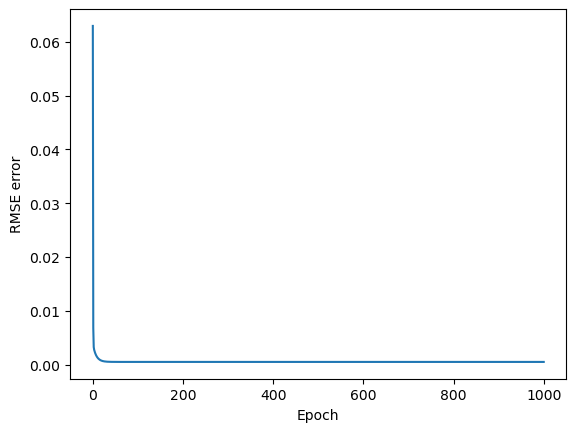

In [7]:
lin_reg = linear_regression(x,y,1)
print('Initial guess w  =' ,lin_reg.w , ', initial guess b  =', lin_reg.b)
print('Actual w   =' ,w , ', actual b   =', b)
lin_reg.full_update(1000)
print('Measured w =' ,lin_reg.w , ', measured b =', lin_reg.b)
lin_reg.plot_train()

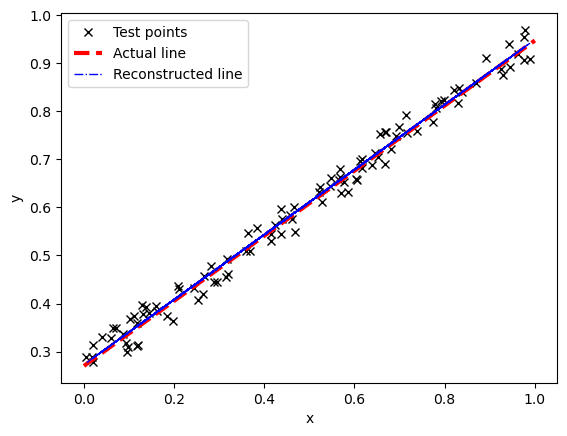

In [8]:
plt.plot(x,y, 'kx', label = 'Test points')
plt.plot([0,1], [b, w+b], 'r--', lw=3, label = 'Actual line')
plt.plot(x,lin_reg.calc_y(), 'b-.', lw=1, label = 'Reconstructed line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#### Gradient descent

<IPython.core.display.Javascript object>


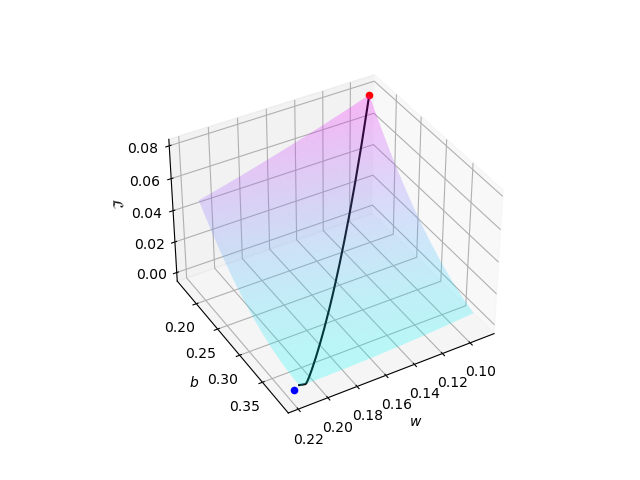

(50, 50)
Surface is the surface of loss function for different weights and biases. The red dot is the starting guess and the blue point is the actual value.


In [32]:
x = np.random.rand(100,1)
w = np.random.rand(x.shape[1])
b = np.random.rand(1)
y = np.sum(w*x,axis = 1) + b + np.random.uniform(-0.04,0.04, (x.shape[0]))
lin_reg = linear_regression(x,y,0.1)
w_run = np.array([lin_reg.w[0]]) #
b_run = np.array([lin_reg.b[0]]) # 
for i in range(5000):
    lin_reg.full_update(1)
    w_run=np.append(w_run,lin_reg.w[0])
    b_run=np.append(b_run,lin_reg.b[0])
%matplotlib notebook
ax = plt.figure().add_subplot(projection='3d')
ww, bb = np.meshgrid(np.linspace(w_run.min(),w_run.max(),50), np.linspace(b_run.min(),b_run.max(),50), sparse=True)
yy = np.sum(np.array([(1 / len(y))* ((ww*x[i] + bb) - y[i])**2 for i in range(len(y))]),axis= 0)
print(yy.shape)
ax.plot(w_run, b_run, lin_reg.L_train, c ='k') # , c='k'
ax.scatter(w_run[0], b_run[0], lin_reg.L_train[0], c ='r') # , c='k'
ax.scatter(w, b, 0, c ='b') # , c='k'
ax.plot_surface(ww, bb, yy,cmap ='cool',  alpha=0.25) # 
ax.set_xlabel('$w$'); ax.set_ylabel('$b$'); ax.set_zlabel('$\mathcal{L}$');
#plt.ion()
plt.show()

print('Surface is the surface of loss function for different weights and biases. The red dot is the starting guess and the blue point is the actual value.')


#### 2D input

In [28]:
%matplotlib inline 
x = np.random.rand(100,2)
w = np.random.rand(x.shape[1])
b = np.random.rand(1)
y = np.sum(w*x,axis = 1) + b + np.random.uniform(-0.04,0.04, (x.shape[0]))

Initial guess w  = [0.79817423 0.26050042] , initial guess b  = [0.80403405]
Actual w   = [0.06488997 0.44979422] , actual b   = [0.8440227]
Measured w = [0.0599582  0.45822518] , measured b = [0.83813273]
1001


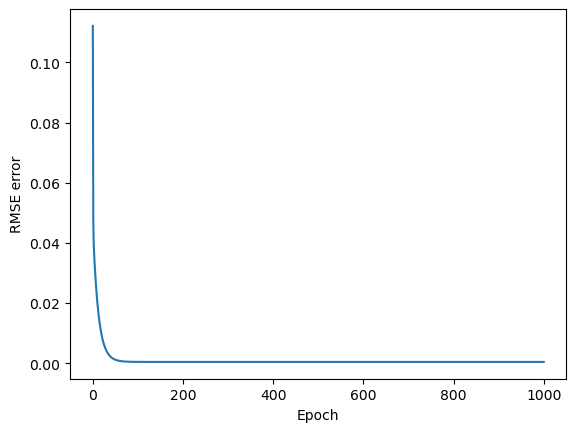

In [29]:
lin_reg = linear_regression(x,y,1)
print('Initial guess w  =' ,lin_reg.w , ', initial guess b  =', lin_reg.b)
print('Actual w   =' ,w , ', actual b   =', b)
lin_reg.full_update(1000)
print('Measured w =' ,lin_reg.w , ', measured b =', lin_reg.b)
lin_reg.plot_train()

<IPython.core.display.Javascript object>


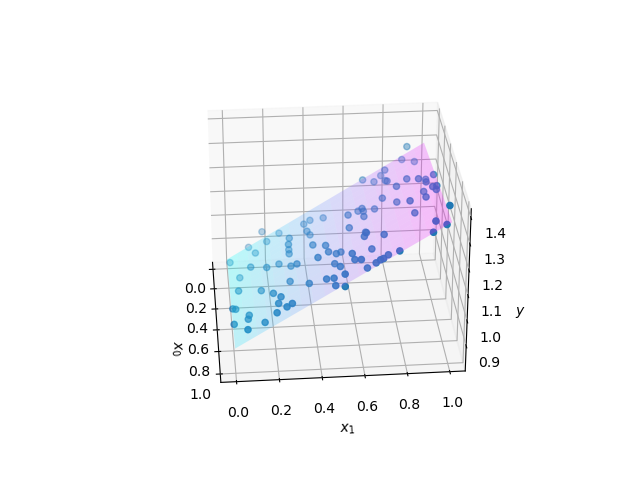

The surface shows the y using the estimated weights and bias from linear regression, the dots are the test set.


In [30]:
%matplotlib notebook
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(x[:,0], x[:,1], y, cmap ='cool') # , c='k'
xx, yy = np.meshgrid(np.linspace(0,1,20), np.linspace(0,1,20), sparse=True)
y_surf = lin_reg.w[0]*xx + lin_reg.w[1]*yy + lin_reg.b 
ax.plot_surface(xx, yy, y_surf,cmap ='cool',  alpha=0.25) # 
ax.set_xlabel('$x_0$'); ax.set_ylabel('$x_1$'); ax.set_zlabel('$y$');
plt.show()
print('The surface shows the y using the estimated weights and bias from linear regression, the dots are the test set.')

Difficult to plot for N > 2.

In [13]:
%matplotlib inline 
x = np.random.rand(1000,10)
w = np.random.rand(x.shape[1])
b = np.random.rand(1)
y = np.sum(w*x,axis = 1) + b + np.random.uniform(-0.04,0.04, (x.shape[0]))

Initial guess w  = [0.12839471 0.10996904 0.50549003 0.04763724 0.40247337 0.74868294
 0.974257   0.49987675 0.25713979 0.62795434] , initial guess b  = [0.14494129]
Actual w   = [0.73103561 0.26916423 0.87046074 0.29387754 0.05125256 0.47034263
 0.29990536 0.46595376 0.29202645 0.98701463] , actual b   = [0.97453606]
Measured w = [0.72939865 0.26932411 0.86962294 0.29313493 0.05185202 0.46974574
 0.30042478 0.46487311 0.29003129 0.98583556] , measured b = [0.97741736]
1001


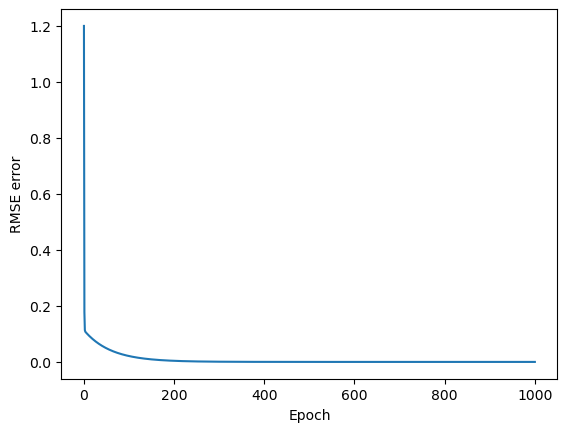

In [14]:
lin_reg = linear_regression(x,y,1)
print('Initial guess w  =' ,lin_reg.w , ', initial guess b  =', lin_reg.b)
print('Actual w   =' ,w , ', actual b   =', b)
lin_reg.full_update(1000)
print('Measured w =' ,lin_reg.w , ', measured b =', lin_reg.b)
lin_reg.plot_train()

#### Real data example?

### General activation function

Linear equation may not accurately model the data try different function... 
\begin{equation}
    \label{eqn:Regression_output}
     y^{(i)} = y(\vec{w}, b; \vec{x}^{(i)}) = f(\vec{w} \cdot \vec{x}^{(i)} + b)= f(z^{(i)})
\end{equation}

Want to find the affects of a small change in the weights and biases on the loss function...
\begin{equation}
    \label{eqn:dLoss_general}
     \Delta\mathcal{L}[Y,\tilde{Y}]\approx \sum_{j=1}^N \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial w_j} \Delta w_j +   \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial b} \Delta b  = 
     \sum_{i=1}^{M}\frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial y^{(i)}} \frac{\partial y^{(i)}}{\partial z^{(i)}} \left( \sum_{j=1}^N x_j \Delta w_j +  \Delta b \right) = \sum_{i=1}^{M} \left( \sum_{j=1}^N x_j^{(i)} \Delta w_j +  \Delta b \right)\delta ^{(i)} 
\end{equation}
where $\delta$ is the error function. This will be used more later when we discuss the backpropagation algorthim. It is defined as
\begin{equation}
    \label{eqn:error}
     \delta ^{(i)} =  \frac{\partial\mathcal{L}[Y,\tilde{Y}]}{\partial z^{(i)}} =  \frac{\partial\mathcal{L}[Y,\tilde{Y}]}{\partial y^{(i)}} \frac{\partial y^{(i)}}{\partial z^{(i)}} 
\end{equation}
Choose to change the weights and bias such that the loss function is reduced. Can do this simply by choosing the change in weights and biases to be
\begin{equation}
     \Delta w_j = -\eta  \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial w_j} = -\eta \sum_{i=1}^M x_j^{(i)} \delta^{(i)} \qquad 
     \Delta b = -\eta  \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial b} = -\eta \sum_{i=1}^M \delta^{(i)} 
\end{equation}
such that, for an arbirary small parameter $\eta$, the change in the loss function becomes
\begin{equation}
    \label{eqn:dLoss_general_eta}
\Delta\mathcal{L} \approx   - \left|\frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial w_j}\right|^2 \eta - \left|\frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial b}\right|^2 \eta = -\sum_{i=1}^{M} \left( \sum_{j=1}^N \left|x_j^{(i)}\right|^2 +  1 \right)\left|\delta ^{(i)}\right|^2\eta .
\end{equation}
This will therefore lead to a smaller loss value. Add diagram of ball rolling down hill, the classic and description of ball rolling down a hill, path of steepest descent ....


In [15]:
class single_node:
    def __init__(self, x, y, eta, activation):
        self.w = np.random.rand(x.shape[1])
        self.b = np.random.rand(1)
        self.x = x
        self.y_test = y
        self.eta = eta
        self.L_train = []
        self.activation = activation
    
    def calc_z(self):
        return np.sum(self.w*self.x, axis = 1) + self.b

    def calc_y(self):
        if(self.activation == "tanh"):
            y = np.tanh(self.calc_z())
        elif(self.activation == "sigmoid"):
            y = 1 / (1 + np.exp(-self.calc_z())) 
        else:
            y = self.calc_z()
        return y
    
    def calc_dy_dz(self):
        if(self.activation == "tanh"):
            dy_dz = 1 - (np.tanh(self.calc_z())**2.)
        elif(self.activation == "sigmoid"):
            dy_dz = self.calc_y() * (1 - self.calc_y())
        else:
            dy_dz = np.ones_like(self.calc_y())
        return dy_dz
    
    def calc_dL_dy(self):
        return (1/len(self.y_test)) * (self.calc_y() - self.y_test)

    def error_function(self):
        return self.calc_dL_dy() * self.calc_dy_dz()
     
    def calc_dz_dw(self):
        return  self.x.T  

    def calc_dz_db(self):
        return 1.

    def calc_L(self): 
        return (1/len(self.y_test)) * sum((self.calc_y() - self.y_test) ** 2)

    def single_update(self):
        #individual update of the weights and biases using gradient descent
        delta = self.error_function()
        dL_dw = np.sum(self.calc_dz_dw() * delta ,axis = 1) #sum is over the samples
        dL_db = np.sum( self.calc_dz_db() * delta)
        self.w -= self.eta*dL_dw#dL_dw should be same shape as w 
        self.b -= self.eta*dL_db
        
    def full_update(self, iterations):
        #full training, repeats process N times
        for i in range(iterations):
            self.single_update()
            self.L_train.append(self.calc_L())
    
    def plot_train(self):
        plt.plot(self.L_train)
        plt.xlabel('Epoch')
        plt.ylabel('RMSE error')
        plt.show()

Initial guess w  = [0.08403687] , initial guess b  = [0.33643686]
Actual w   = [0.6956519] , actual b   = [0.63288769]
Measured w = [0.6952813] , measured b = [0.63308275]
1001


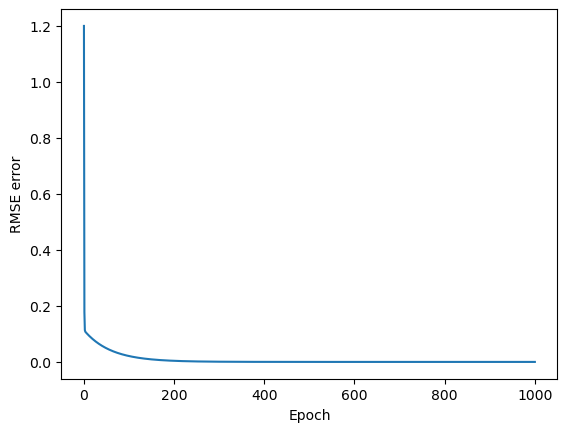

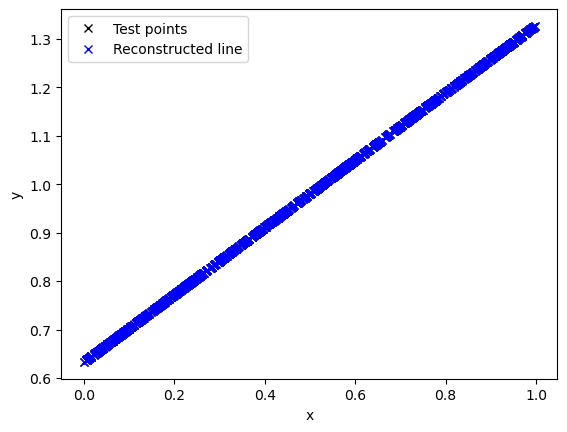

In [16]:
x = np.random.rand(1000,1)#* 16 - 8
w = np.random.rand(x.shape[1])
b = np.random.rand(1)
z = np.sum(w*x,axis = 1) + b
y = z# np.tanh(z)#(1 / (1 + np.exp(-z)))  # np.random.uniform(-0.0005,0.0005, (x.shape[0]))
node = single_node(x,y,1, "")
print('Initial guess w  =' ,node.w , ', initial guess b  =', node.b)
print('Actual w   =' ,w , ', actual b   =', b)
node.full_update(100)
print('Measured w =' ,node.w , ', measured b =', node.b)
lin_reg.plot_train()
plt.plot(x,y, 'kx', label = 'Test points')
plt.plot(x,node.calc_y(), 'bx', lw=1, label = 'Reconstructed line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Initial guess w  = [0.82539011] , initial guess b  = [0.38897544]
Actual w   = [0.84353672] , actual b   = [0.85020252]
Measured w = [0.84320292] , measured b = [0.84941968]
1001


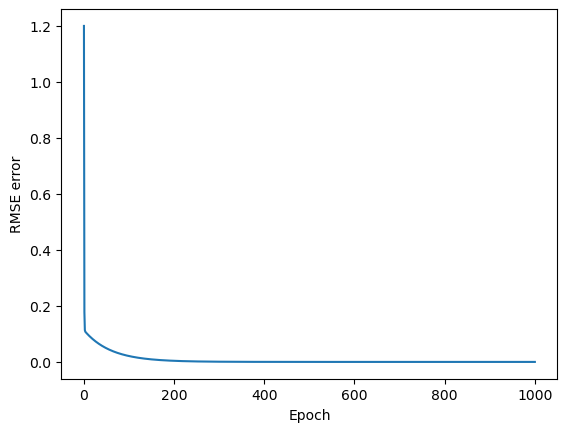

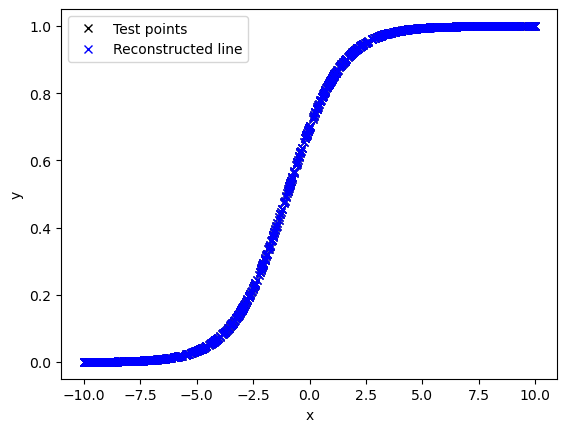

In [17]:
x = np.random.rand(1000,1)* 20 - 10
w = np.random.rand(x.shape[1])
b = np.random.rand(1)
z = np.sum(w*x,axis = 1) + b
y = (1 / (1 + np.exp(-z)))  # np.random.uniform(-0.0005,0.0005, (x.shape[0]))
node = single_node(x,y,1, "sigmoid")
print('Initial guess w  =' ,node.w , ', initial guess b  =', node.b)
print('Actual w   =' ,w , ', actual b   =', b)
node.full_update(1000)
print('Measured w =' ,node.w , ', measured b =', node.b)
lin_reg.plot_train()
plt.plot(x,y, 'kx', label = 'Test points')
plt.plot(x,node.calc_y(), 'bx', lw=1, label = 'Reconstructed line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Initial guess w  = [0.69826685] , initial guess b  = [0.16532042]
Actual w   = [0.63347469] , actual b   = [0.42306582]
Measured w = [0.63347469] , measured b = [0.42306582]
1001


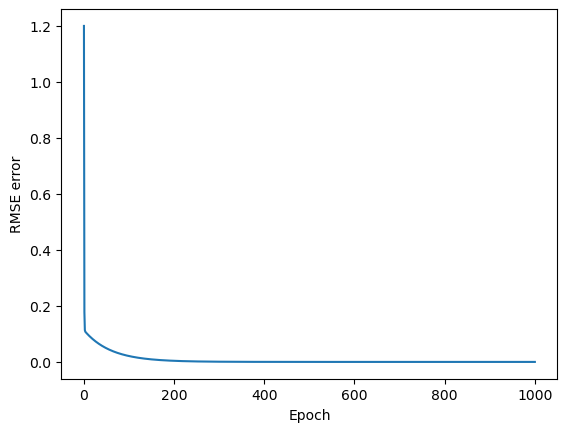

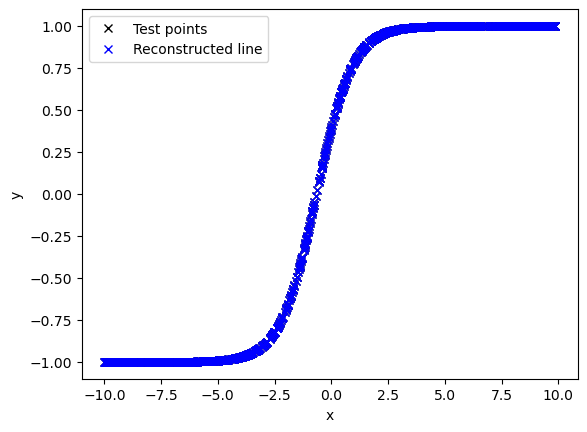

In [18]:
x = np.random.rand(1000,1)* 20 - 10
w = np.random.rand(x.shape[1])
b = np.random.rand(1)
z = np.sum(w*x,axis = 1) + b
y = np.tanh(z)#(1 / (1 + np.exp(-z)))  # np.random.uniform(-0.0005,0.0005, (x.shape[0]))
node = single_node(x,y,1, "tanh")
print('Initial guess w  =' ,node.w , ', initial guess b  =', node.b)
print('Actual w   =' ,w , ', actual b   =', b)
node.full_update(1000)
print('Measured w =' ,node.w , ', measured b =', node.b)
lin_reg.plot_train()
plt.plot(x,y, 'kx', label = 'Test points')
plt.plot(x,node.calc_y(), 'bx', lw=1, label = 'Reconstructed line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Examples

Hyperbolic tan loss activtion function.
\begin{equation}
    \label{eqn:tanh}
     f(\vec{w} \cdot \vec{x} + b) = \tanh(\vec{w} \cdot \vec{x} + b); \quad \frac{\partial f(\vec{w} \cdot \vec{x} + b)}{\partial w_j} =x_j(1 - tanh^2(\vec{w} \cdot \vec{x} + b)); \quad \frac{\partial f(\vec{w} \cdot \vec{x} + b)}{\partial b} = (1 - tanh^2(\vec{w} \cdot \vec{x} + b))
\end{equation}
Sigmoid function.
\begin{equation}
    \label{eqn:sigmoid}
      f(x) = \sigma(x) =\frac{1}{1 + e^{-x}}; \quad f'(x) = \sigma'(x) = \frac{e^{-x}}{(1 + e^{-x})^2} = \sigma(x)(1 - \sigma(x));
\end{equation}


Diagram of linear regression thing

## Backpropagation, or how I learned to stop worrying and love the indices

In [19]:
net = plot_partial_network(pd.read_csv('classification.csv'))
net.show('mygraph_full_'  + '.html')

## Multiple hidden layers the same but with more indices

In [20]:
net = plot_partial_network(pd.read_csv('hidden.csv'))
net.show('mygraph_full_'  + '.html')

## Gradient descent

### Loss function

### Gradient descent

## Stochastic gradient descent

## Training / testing split

# Single layer neural networks

## Backpropagation algorthim

# Multi-layer networks (deep?)

# Different architectures

# NNP

# Example code to be dispersed through notes not used at moment

In [21]:
import numpy as np
from matplotlib import pyplot as plt

In [22]:
m = np.random.uniform(-10,10, (2))
c = np.random.uniform(-10,10, (1))
def f(m,c,x):
    return np.sum(m*x,axis=1) + c

def df_dx(m,c,x):
    return m

def df_dm(m,c,x):
    return x

def df_dc(m,c,x):
    return 1.
print('Want to predict the gradient: ',m,' and the intercept: ',c)

Want to predict the gradient:  [1.06544384 3.34264163]  and the intercept:  [2.71375256]


(100,)
(100,)
(100,)


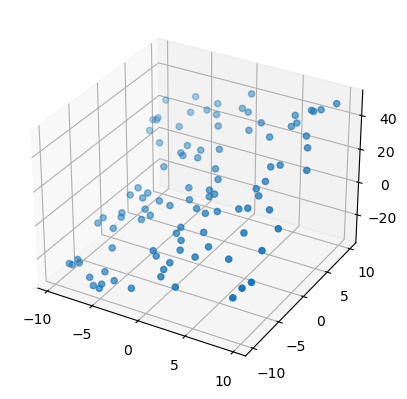

In [23]:
x = np.random.uniform(-10,10, (100, 2))
y = f(m,c,x) + np.random.uniform(-10,10, (1))
ax = plt.figure().add_subplot(projection='3d')
print(y.shape)
print(x[:,0].shape)
print(x[:,1].shape)
ax.scatter(x[:,0], x[:,1], y)

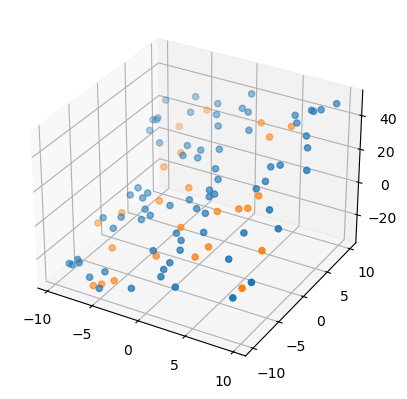

In [24]:
def test_train_split(x,y, splt):
    a =  np.split(np.column_stack((x, y)), [int(len(y)*splt), len(y)], axis = 0)
    train_x = a[0][:,0:x.shape[1]]
    train_y = a[0][:,x.shape[1]]
    test_x = a[1][:,0:x.shape[1]]
    test_y = a[1][:,x.shape[1]]
    return train_x, test_x, train_y, test_y

train_x, test_x, train_y, test_y = test_train_split(x,y,0.75)
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(train_x[:,0], train_x[:,1], train_y)
ax.scatter(test_x[:,0], test_x[:,1], test_y)

In [25]:
guess_m = np.random.uniform(-10,10, m.shape)
guess_c = np.random.uniform(-10,10, c.shape)
